In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn.preprocessing
import tensorflow as tf
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('train/features.csv',header = None)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-424.004655,85.886018,-19.391035,19.548873,-3.152061,-3.135796,-5.586479,2.204532,-0.968167,-4.146447,...,0.756196,0.754540,18.187436,14.309552,16.744301,16.287958,16.495040,18.176403,53.666413,down
1,-427.845940,61.444910,-69.906503,75.739853,-35.569725,9.582659,6.669224,5.555409,4.426516,9.670583,...,0.789944,0.717734,23.542518,16.525604,19.920645,17.190587,18.389313,21.918735,60.188674,down
2,-327.288344,107.655145,-85.208783,-4.627603,-34.472271,-2.624659,-18.956204,-6.853750,-7.975197,-20.111568,...,0.553500,0.663733,31.389790,14.436285,17.012344,18.676632,18.853558,19.082480,57.331269,down
3,-341.501762,107.211360,-90.836330,-0.098215,-33.703336,-3.610792,-29.906583,-9.599740,-18.541331,-23.105156,...,0.536866,0.596243,29.135632,14.979695,17.966184,17.527041,17.873409,20.326471,57.930192,down
4,-442.097720,142.172651,-25.851881,33.580954,-4.230062,12.438396,-16.501494,12.557016,0.892619,-2.308974,...,0.361471,0.472670,26.285881,19.839796,20.518118,19.795706,18.634939,17.751166,56.695714,down
5,-481.401211,96.320072,-3.340789,6.039630,-1.719361,16.746752,-0.383682,-8.960226,6.744356,-1.369229,...,0.626463,0.570527,20.251495,15.690428,17.070937,16.076208,22.293984,21.240883,51.277368,down


In [3]:
df = shuffle(df)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
14478,-333.681364,130.329232,0.321711,37.352478,8.991458,21.009426,-7.347120,2.926471,9.192337,-1.285272,...,0.656229,0.618991,20.608630,14.823694,16.085269,15.570495,19.752411,19.580212,49.649687,right
53779,-193.152434,122.221520,-51.292561,50.933137,-48.466207,35.913824,-27.859928,17.481937,-7.220476,4.397814,...,0.571067,0.612054,13.993230,13.438817,15.450493,15.201903,17.873088,16.969728,67.328210,unknown
39324,-397.433994,135.709828,-56.030748,43.119616,10.883204,21.592556,11.034850,9.081485,8.867335,16.951063,...,0.625539,0.609749,22.135568,17.568748,15.915933,13.979939,18.450613,22.024194,56.153385,unknown
39368,-475.983507,97.149996,-13.002183,26.815174,7.942826,-4.800929,-1.142322,-8.006042,2.259144,0.571355,...,0.623862,0.685052,18.429155,14.634313,18.238495,15.569912,17.027991,21.011901,49.624668,unknown
39068,-499.078682,123.405728,-29.477016,68.025884,-16.589553,29.186493,0.409351,2.754675,-1.199870,12.231962,...,0.787645,0.696109,22.875983,11.440279,12.622149,13.358987,15.617734,18.389820,57.264418,unknown
13000,-583.553439,118.171635,-9.595871,-10.589174,-12.837243,2.043973,18.265363,-9.853912,-16.418323,1.046255,...,0.745603,0.613810,22.796352,14.502942,17.453675,16.153588,18.816369,20.039646,50.547378,on


# Partitioning Data

In [4]:
tr = 60000
features = np.array(df)
tr_x = features[:tr,0:59]
tr_y = features[:tr,59]
val_x = features[tr:,0:59]
val_y = features[tr:,59]

# Preprocessing 

In [5]:
tr_mean = np.mean(tr_x, axis=0)
tr_std = np.std(tr_x, axis = 0,dtype=np.float64)
tr_xp = (tr_x - tr_mean[None,:])/tr_std[None,:]

val_mean = np.mean(val_x, axis=0)
val_std = np.std(val_x, axis = 0,dtype=np.float64)
val_xp = (val_x - val_mean[None,:])/val_std[None,:]

lab = LabelEncoder()
tr_yp= lab.fit_transform(tr_y)
val_yp= lab.fit_transform(val_y)

n_words= np.unique(tr_yp)
n_classes = len(n_words)
n_features = tr_xp.shape[1]

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(n_classes))
tr_yoh = label_binarizer.transform(tr_yp)
val_yoh = label_binarizer.transform(val_yp)

# PCA

In [6]:
pca = decomposition.PCA(n_components ='mle', svd_solver = 'full')
pca.fit(tr_xp)
tr_pca = pca.transform(tr_xp)
val_pca = pca.transform(val_xp)

# Neural Network 

## Simple 3-layer deep 

In [7]:
n_nodes_hl1 = 700
n_nodes_hl2 = 700
n_nodes_hl3 = 100

batch_size = 200
# one epoch = one cycle of feed-forward and backprop
n_epochs = 30

x = tf.placeholder('float',[None,n_features])
y = tf.placeholder('float',[None,n_classes])
epoch_losses =[]

In [8]:
def neural_network_model(data):

    # initializing weights and biases for the hidden layers and the output layer
    hidden_l1 = {'weights': tf.Variable(tf.random_normal([n_features,n_nodes_hl1])), 
                 'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_l2 = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])), 
                 'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_l3 = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])), 
                 'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])), 
                 'biases':tf.Variable(tf.random_normal([n_classes]))}

    # computing the ouput of each layer and applying a non-linearity at the end of each layer computation
    l1 = tf.add(tf.matmul(data, hidden_l1['weights']), hidden_l1['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_l2['weights']), hidden_l2['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_l3['weights']), hidden_l3['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.add(tf.matmul(l3, output_l['weights']), output_l['biases'])

    return output


In [9]:

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))

    # learning rate = 0.001
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    # one epoch = one cycle of feed-forward and backprop
    n_epochs = 30

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(n_epochs):
            epoch_loss = 0
            for index, offset in enumerate(range(0, tr, batch_size)):
                x_epoch, y_epoch = np.array(tr_xp[offset: offset + batch_size,:]), np.array(tr_yoh[offset: offset + batch_size])
                _, c = sess.run([optimizer, cost], feed_dict ={x:x_epoch, y:y_epoch}) 
                epoch_loss +=c
            epoch_losses.append(epoch_loss)
            if (epoch%10 == 0):
                    print ('Epoch', epoch, 'completed out of', n_epochs, 'loss:', epoch_loss)
                    
        correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
        accuracy  = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:', accuracy.eval({x:val_xp, y:val_yoh}))

In [10]:
train_neural_network(x)

Epoch 0 completed out of 30 loss: 1208270.10965
Epoch 10 completed out of 30 loss: 471.758314252
Epoch 20 completed out of 30 loss: 458.031672359
Accuracy: 0.628343


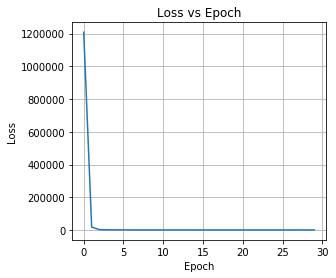

In [43]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.set_title('Loss vs Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.plot(np.arange(0,30),np.asarray(epoch_losses))

## Convolutional Neural Network